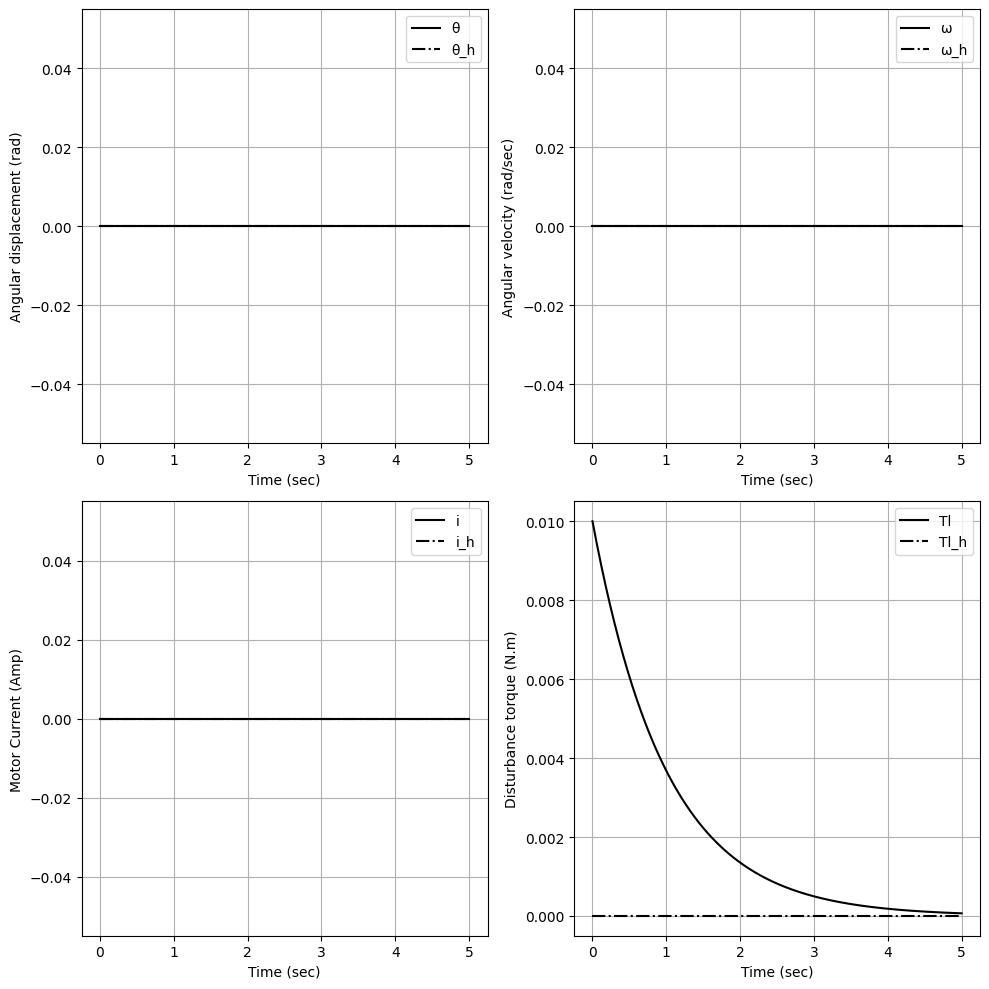

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# تعریف پارامترها
class Par:
    Tl = 0.01

# تابع دینامیکی موتور DC
def DC_motor_LTR1(t, x):
    # اینجا باید معادلات دیفرانسیل موتور DC را تعریف کنید
    # فعلا به صورت پیش فرض یک تابع خطی ساده استفاده شده است
    dxdt = np.zeros(7)
    # معادلات دینامیکی موتور و ناظر
    # dxdt[0] = ...
    # dxdt[1] = ...
    # ...
    return dxdt

# مقادیر اولیه
tspan = [0, 5]
x0 = [0, 0, 0, 0, 0, 0, 0]

# شبیه‌سازی
sol = solve_ivp(DC_motor_LTR1, tspan, x0, method='RK45', max_step=1e-2, t_eval=np.linspace(tspan[0], tspan[1], 500))

# استخراج مقادیر
t = sol.t
x = sol.y.T

# رسم نمودارها
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(t, x[:, 0], 'k', label='θ')
plt.plot(t, x[:, 3], '-.k', label='θ_h')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Angular displacement (rad)')
plt.legend()

plt.subplot(222)
plt.plot(t, x[:, 1], 'k', label='ω')
plt.plot(t, x[:, 4], '-.k', label='ω_h')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Angular velocity (rad/sec)')
plt.legend()

plt.subplot(223)
plt.plot(t, x[:, 2], 'k', label='i')
plt.plot(t, x[:, 5], '-.k', label='i_h')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Motor Current (Amp)')
plt.legend()

Tl = Par.Tl * np.exp(-t)
plt.subplot(224)
plt.plot(t, Tl, 'k', label='Tl')
plt.plot(t, x[:, 6], '-.k', label='Tl_h')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Disturbance torque (N.m)')
plt.legend()

plt.tight_layout()
plt.show()
